In [1]:
import pandas as pd

# Load the dataset (adjust the file path if necessary)
file_path = '/work/Output Data/CloudResearch-1_24.08.12_clustered.csv'
df = pd.read_csv(file_path)

# Clean Up Categories

In [2]:
# Remove ", etc" from all columns
df_cleaned = df.replace({', etc': ''}, regex=True)

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [3]:
df_cleaned

,Unnamed:_0,index,StartDate,EndDate,Status_x,Progress,Duration_(in_seconds),Finished,RecordedDate,ResponseId,...,HHI_CommIntent___Familiar_centered,H_State_Empathy_centered,H_SEmp_Affective_centered,H_SEmp_Cognitive_centered,H_SEmp_Associative_centered,H_Social_Attract_centered,H_Task_Attract_centered,H_Homophily_centered,Age_centered,Cluster
0,0,2,2024-06-10 16:25:22,2024-06-10 16:36:39,IP Address,100,677,True,2024-06-10 16:36:40,R_3Tq3KIlfVrBymDk,...,1.090324,0.444724,-0.387472,0.575424,1.021357,0.713421,1.054605,-1.228242,-0.256860,5
1,1,3,2024-06-10 16:22:15,2024-06-10 16:37:20,IP Address,100,905,True,2024-06-10 16:37:21,R_77JLXrlZNFvFjZA,...,-1.232124,-3.172764,-3.002680,-2.625557,-3.178423,-0.627147,-1.609661,-0.545932,0.144966,0
2,2,4,2024-06-10 16:26:47,2024-06-10 16:39:38,IP Address,100,770,True,2024-06-10 16:39:38,R_1xOvnrl7kD6ysKd,...,1.090324,0.712686,0.733331,0.575424,0.671376,-1.520859,-1.609661,1.330419,-0.457773,5
3,3,5,2024-06-10 16:22:16,2024-06-10 16:39:57,IP Address,100,1060,True,2024-06-10 16:39:57,R_6i2xfeJezDf9zMB,...,-2.393348,-1.163048,-1.508276,-1.025067,-0.728551,-1.744287,-1.387639,-0.545932,-0.357317,1
4,4,6,2024-06-10 16:25:01,2024-06-10 16:40:11,IP Address,100,909,True,2024-06-10 16:40:11,R_2oYYZFDVjHmNVrC,...,-0.070900,0.310743,-0.013871,0.575424,0.321394,-0.403719,-0.277528,-0.034200,-0.256860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,399,671,2024-08-05 17:07:39,2024-08-05 17:39:17,IP Address,100,1898,True,2024-08-05 17:39:18,R_5EA6LxEv0KYmvLe,...,0.703250,0.578705,0.359730,0.575424,0.671376,0.936849,0.610561,0.989264,-0.859599,1
400,400,673,2024-08-06 08:47:03,2024-08-06 08:55:45,IP Address,100,521,True,2024-08-06 08:55:46,R_1Dp5aKQHCAxZrmG,...,0.703250,0.846667,0.359730,0.975546,1.021357,0.936849,0.832583,1.500997,0.747704,3
401,401,676,2024-08-06 21:41:46,2024-08-06 21:55:01,IP Address,100,794,True,2024-08-06 21:55:02,R_6IFqIBMPCNE0ZtT,...,-2.006274,-1.564991,-1.881877,-1.025067,-1.428514,-0.627147,-1.609661,-0.375355,-0.658686,0
402,402,693,2024-08-08 17:30:42,2024-08-08 17:46:22,IP Address,100,939,True,2024-08-08 17:46:23,R_40JjHfQYavKjN2N,...,1.090324,1.114629,1.106932,0.975546,1.021357,0.936849,1.054605,1.330419,-0.960055,3


In [4]:
# Print unique values in the 'Chatbot Topics' column
Use_Interest = df_cleaned['Use_Interest'].unique()
#print(Use_Interest)

# Print unique values in the 'Chatbot Topics' column
unique_topics = df_cleaned['Chatbot_Topics'].unique()
#print(unique_topics)

Continued_Use = df_cleaned['Continued_Use'].unique()
#print(Continued_Use)





In [5]:
import re

def search_replace_columns(df):
    # Dictionary for Use_Interest column
    use_interest_mapping = {
        'Curious about AI/chatbots/the service': 'Curiosity about AI and chatbots',
        'Wanted to have fun': 'Desire for fun and entertainment',
        'To use it for a creative purpose (creative writing, character development.)': 'Use for creative purposes',
        'Feeling lonely': 'Coping with loneliness',
        'To get better at being social and talking to people': 'Improving social and conversational skills',
        'Seeking a relationship with a chatbot': 'Seeking a chatbot relationship',
        'Other': 'Other reasons'
}
    
    # Dictionary for Chatbot_Topics column
    chatbot_topics_mapping = {
        'Casual conversation': 'Casual conversation',
        'Entertainment and play': 'Entertainment and play',
        'Venting/talking about personal issues regarding yourself (mental health, problems you are facing)': 'Personal issues and mental health',
        'Talking about past events / reviewing events in a day': 'Past events',
        'Talking about plans for the future': 'Future plans',
        'Venting/talking about personal issues regarding others (interpersonal drama, negative feelings towards others.)': 'Interpersonal issues and drama',
        'Other': 'Other topics'
    }
    
    # Dictionary for Continued_Use column
    continued_use_mapping = {
        'For enjoyment/pleasure/fun': 'For enjoyment/fun',
        'To satisfy curiosity; to better understand the chatbot': 'To satisfy curiosity',
        'To pass time or escape from pressure/stress': 'To pass time/reduce stress',
        'For social interaction/companionship with the chatbot': 'For chatbot companionship',
        'To not feel lonely': 'To alleviate loneliness',
        'For other emotional experiences': 'For emotional experiences',
        'To better understand self/identity': 'For self-discovery',
        'To better understand other people through using the chatbot': 'To understand others',
        'To bolster self-confidence, self-esteem': 'To boost self-confidence/esteem',
        'Other': 'Other reasons'
    }
    
    
    columns_to_check = ['Use_Interest', 'Chatbot_Topics', 'Continued_Use']
    mappings = {
        'Use_Interest': use_interest_mapping,
        'Chatbot_Topics': chatbot_topics_mapping,
        'Continued_Use': continued_use_mapping
    }
    
    changes = {col: 0 for col in columns_to_check}
    rows_changed = 0
    
    def replace_words(text, mapping):
        if not isinstance(text, str):
            return text, 0
        
        change_count = 0
        for old, new in mapping.items():
            if old in text:
                text = text.replace(old, new)
                change_count += 1
        return text, change_count

    for index, row in df.iterrows():
        row_changed = False
        for col in columns_to_check:
            old_value = str(row[col])
            new_value, col_changes = replace_words(old_value, mappings[col])
            if old_value != new_value:
                df.at[index, col] = new_value
                changes[col] += col_changes
                row_changed = True
        if row_changed:
            rows_changed += 1
    
    total_changes = sum(changes.values())
    
    print(f"Number of replacements made:")
    for column, count in changes.items():
        print(f"{column}: {count}")
    print(f"Total changes across all columns: {total_changes}")
    print(f"Number of rows changed: {rows_changed}")
    
    return df

# Example usage:
# df_cleaned = search_replace_columns(df_cleaned)

In [6]:
df_cleaned = search_replace_columns(df_cleaned)

Number of replacements made:
Use_Interest: 1078
Chatbot_Topics: 1049
Continued_Use: 1258
Total changes across all columns: 3385
Number of rows changed: 404


In [7]:
from collections import defaultdict

def analyze_unique_answers(df):
    columns_to_analyze = ['Use_Interest', 'Chatbot_Topics', 'Continued_Use']
    unique_answers = defaultdict(set)

    for column in columns_to_analyze:
        for row in df[column]:
            if isinstance(row, str):
                # Split the row by comma and strip whitespace
                answers = [answer.strip() for answer in row.split(',')]
                # Add each answer to the set of unique answers for this column
                unique_answers[column].update(answers)

    # Print the results
    for column in columns_to_analyze:
        print(f"\nUnique answers for {column}:")
        for i, answer in enumerate(sorted(unique_answers[column]), 1):
            print(f"{i}. {answer}")
        print(f"Total unique answers: {len(unique_answers[column])}")

    return unique_answers

# Example usage:
unique_answers = analyze_unique_answers(df_cleaned)


Unique answers for Use_Interest:
1. Coping with loneliness
2. Curiosity about AI and chatbots
3. Desire for fun and entertainment
4. Improving social and conversational skills
5. Other reasons
6. Seeking a chatbot relationship
7. Use for creative purposes
Total unique answers: 7

Unique answers for Chatbot_Topics:
1. Casual conversation
2. Entertainment and play
3. Future plans
4. Interpersonal issues and drama
5. Other topics
6. Past events
7. Personal issues and mental health
Total unique answers: 7

Unique answers for Continued_Use:
1. For chatbot companionship
2. For emotional experiences
3. For enjoyment/fun
4. For self-discovery
5. Other reasons
6. To alleviate loneliness
7. To boost self-confidence/esteem.
8. To pass time/reduce stress
9. To satisfy curiosity
10. To understand others
Total unique answers: 10


# Graph and Results

In [8]:
for i in df_cleaned.columns:
    print (i)

Unnamed:_0
index
StartDate
EndDate
Status_x
Progress
Duration_(in_seconds)
Finished
RecordedDate
ResponseId
DistributionChannel
UserLanguage
Q_RecaptchaScore
Consent
Quality_Affirmation
Usage
Which_Chatbots
Which_Chatbots_3_TEXT
Chatbot_Frequency
Chatbot_Frequency_8_TEXT
Session_Length
Usage_Timeframe
Chatbot_Device
Chatbot_Device_4_TEXT
Use_Interest
Use_Interest_6_TEXT
Use_Interest___FR
Continued_Use
Continued_Use_8_TEXT
Continued_Use___FR
Chatbot_Topics
Chatbot_Topics_7_TEXT
Chatbot_Topics___FR
Relation_Effect_1
Relation_Effect_2
Relation_Effect_3
Relation_Effect_4
Relation_Effect_5
Relation_Effect_6
Relation_Effect___FR
Agent_Pref_1
Agent_Pref_2
Agent_Pref_3
Agent_Pref_4
Agent_Pref_5
Agent_Pref_6
Agent_Pref___FR
Pref_Reason___Bot
Pref_Reason___Bot_7_TEXT
Pref_Reason___Person
Pref_Reason___Person_6_TEXT
Pref_Reason___FR
ULS1
ULS2
ULS3
ULS4
ULS5
ULS6
ULS7
ULS8
BFI_10_1
BFI_10_2
BFI_10_3
BFI_10_4
BFI_10_5
BFI_10_6
BFI_10_7
BFI_10_8
BFI_10_9
BFI_10_10
MSPSS_Person
LSNS1
LSNS2
LSNS3
LSNS

In [9]:
import pandas as pd
import numpy as np

def analyze_distribution(df, column, split_answers=True):
    if split_answers:
        # Split answers by comma and create a new series with exploded answers
        all_answers = df[column].str.split(',').explode()
    else:
        all_answers = df[column]
    
    # Count occurrences of each answer
    answer_counts = all_answers.value_counts()
    
    # Calculate percentages
    total_answers = answer_counts.sum()
    percentages = (answer_counts / total_answers * 100).round(2)
    
    # Create a DataFrame with counts and percentages
    result_df = pd.DataFrame({
        'Count': answer_counts,
        'Percentage': percentages
    })
    
    return result_df

# Assuming df_cleaned is your DataFrame
columns_to_analyze = [
    'Which_Chatbots', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics',
    'Session_Length', 'Usage_Timeframe', 'Chatbot_Device'
]

for column in columns_to_analyze:
    print(f"\nDistribution for {column}:")
    if column == 'Chatbot_Device':
        distribution = analyze_distribution(df_cleaned, column, split_answers=False)
    else:
        distribution = analyze_distribution(df_cleaned, column)
    print(distribution)
    print(f"Total: {distribution['Count'].sum()} (100.00%)")


Distribution for Which_Chatbots:
               Count  Percentage
Snapchat MyAI    179       31.63
Character.ai     172       30.39
Replika          128       22.61
Other             53        9.36
Anima             27        4.77
Xiaoice            7        1.24
Total: 566 (100.00%)

Distribution for Use_Interest:
                                            Count  Percentage
Curiosity about AI and chatbots               333       30.89
Desire for fun and entertainment              284       26.35
Use for creative purposes                     192       17.81
Coping with loneliness                        132       12.24
Improving social and conversational skills     78        7.24
Seeking a chatbot relationship                 38        3.53
Other reasons                                  21        1.95
Total: 1078 (100.00%)

Distribution for Continued_Use:
                                  Count  Percentage
For enjoyment/fun                   298       23.69
To satisfy curiosity       

In [10]:
import pandas as pd
import numpy as np

def analyze_distribution(df, column, split_answers=True):
    if split_answers:
        # Split answers by comma and create a new series with exploded answers
        all_answers = df[column].str.split(',').explode()
    else:
        all_answers = df[column]
    
    # Count occurrences of each answer
    answer_counts = all_answers.value_counts()
    
    # Calculate percentages
    total_answers = answer_counts.sum()
    percentages = (answer_counts / total_answers * 100).round(2)
    
    # Create a Series with percentages
    result_series = percentages.sort_values(ascending=False)
    
    return result_series

# Assuming df_cleaned is your DataFrame
columns_to_analyze = [
    'Which_Chatbots', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics',
    'Session_Length', 'Usage_Timeframe', 'Chatbot_Device'
]

for column in columns_to_analyze:
    print(f"\nDistribution for {column}:")
    if column == 'Chatbot_Device':
        distribution = analyze_distribution(df_cleaned, column, split_answers=False)
    else:
        distribution = analyze_distribution(df_cleaned, column)
    
    # Format and print the percentages
    for answer, percentage in distribution.items():
        print(f"{answer}: {percentage:.2f}%")
    
    print("Total: 100.00%")


Distribution for Which_Chatbots:
Snapchat MyAI: 31.63%
Character.ai: 30.39%
Replika: 22.61%
Other: 9.36%
Anima: 4.77%
Xiaoice: 1.24%
Total: 100.00%

Distribution for Use_Interest:
Curiosity about AI and chatbots: 30.89%
Desire for fun and entertainment: 26.35%
Use for creative purposes: 17.81%
Coping with loneliness: 12.24%
Improving social and conversational skills: 7.24%
Seeking a chatbot relationship: 3.53%
Other reasons: 1.95%
Total: 100.00%

Distribution for Continued_Use:
For enjoyment/fun: 23.69%
To satisfy curiosity : 20.91%
To pass time/reduce stress: 12.88%
For chatbot companionship: 9.86%
To alleviate loneliness: 6.92%
For emotional experiences : 6.52%
For self-discovery: 6.12%
To understand others: 5.88%
To boost self-confidence/esteem.: 5.41%
Other reasons: 1.83%
Total: 100.00%

Distribution for Chatbot_Topics:
Casual conversation: 26.28%
Entertainment and play: 21.66%
Personal issues and mental health: 14.17%
Past events: 12.60%
Future plans: 11.70%
Interpersonal issues 

/tmp/ipykernel_683/1580424935.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distribution.index, rotation=45, ha='right')
/tmp/ipykernel_683/1580424935.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distribution.index, rotation=45, ha='right')
/tmp/ipykernel_683/1580424935.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(distribution.index, rotation=45, ha='right')
/tmp/ipykernel_683/1580424935.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


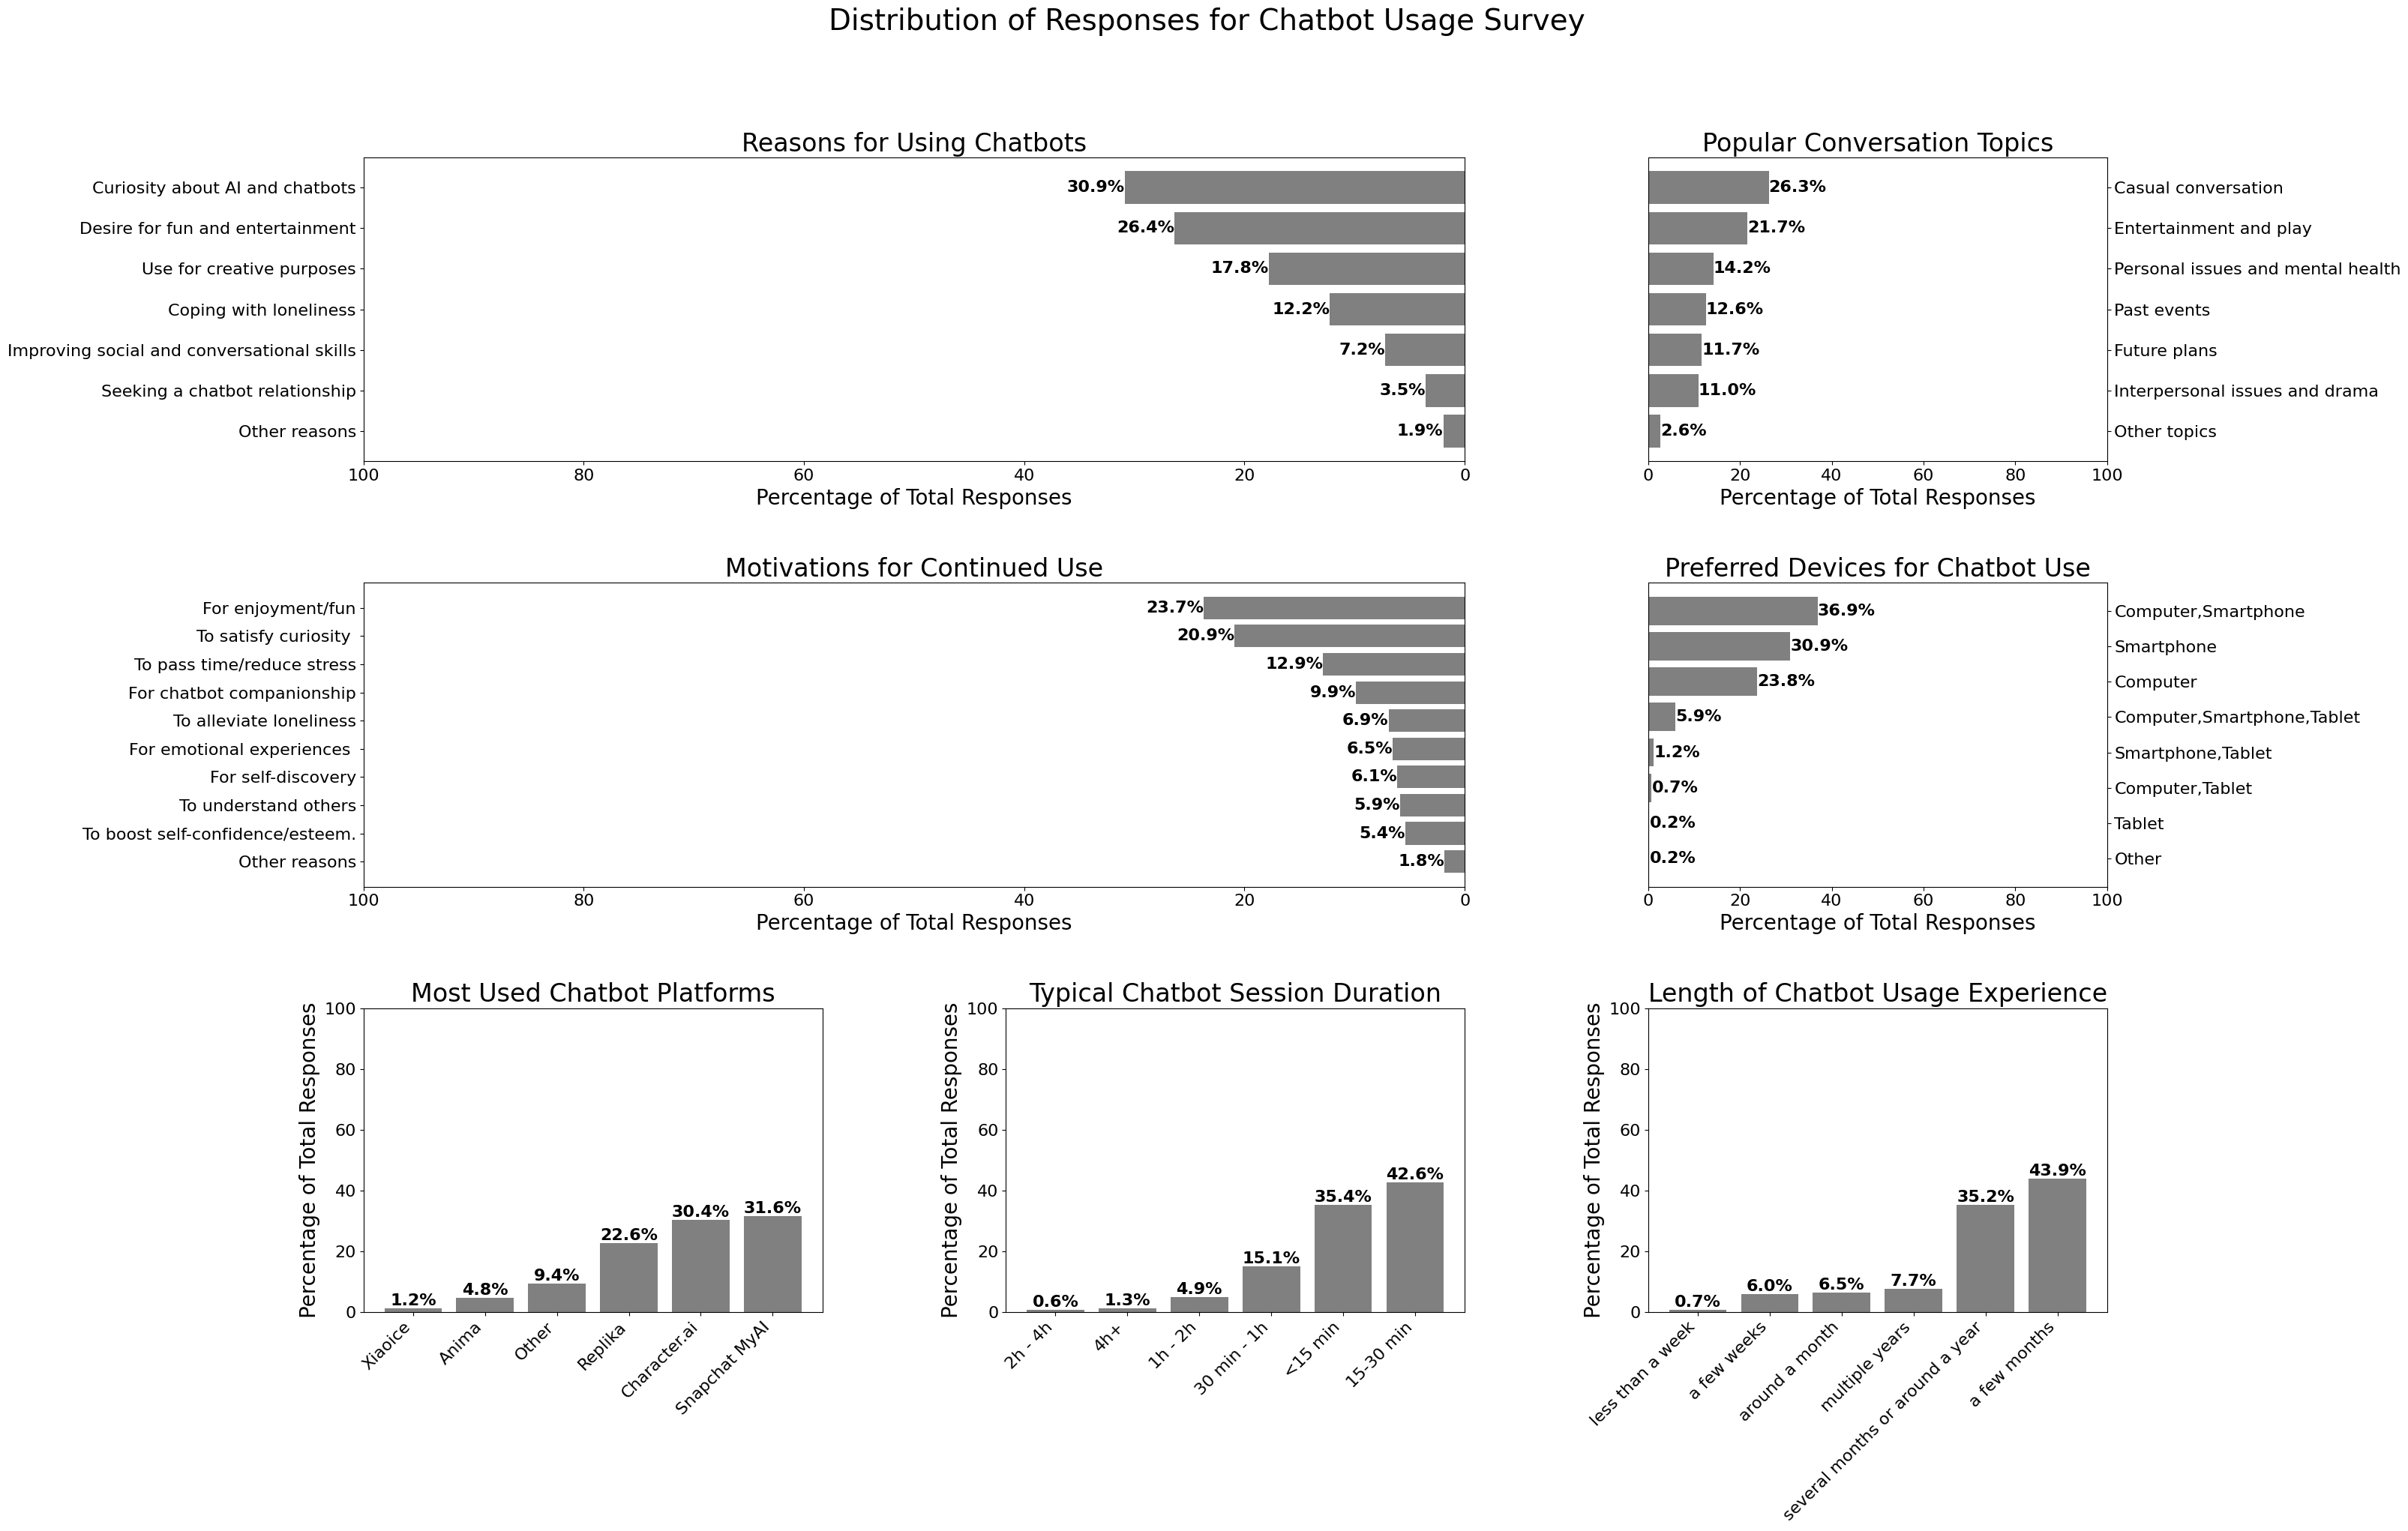

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def analyze_distribution(df, column, split_answers=True):
    if split_answers:
        all_answers = df[column].str.split(',').explode()
    else:
        all_answers = df[column]
    
    answer_counts = all_answers.value_counts()
    total_answers = answer_counts.sum()
    percentages = (answer_counts / total_answers * 100).round(2)
    
    return percentages.sort_values(ascending=True)

def create_combined_chart(df_cleaned, columns_to_analyze):
    horizontal_columns = ['Use_Interest', 'Chatbot_Topics', 'Continued_Use', 'Chatbot_Device']
    vertical_columns = ['Which_Chatbots', 'Session_Length', 'Usage_Timeframe']
    
    fig = plt.figure(figsize=(30, 20))
    
    gs = GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.4)
    
    fig.suptitle('Distribution of Responses for Chatbot Usage Survey', fontsize=28)
    
    # Create horizontal bar charts
    for idx, column in enumerate(horizontal_columns):
        row = idx // 2
        col = idx % 2
        
        ax = fig.add_subplot(gs[row, col*2:(col+1)*2])
        
        split_answers = column != 'Chatbot_Device'
        distribution = analyze_distribution(df_cleaned, column, split_answers)
        
        if col == 0:  # Left column
            bars = ax.barh(distribution.index, distribution.values, color='gray', align='center')
            ax.set_xlim(100, 0)  # Reverse x-axis
            ax.yaxis.tick_left()
            ax.yaxis.set_label_position("left")
            for bar in bars:
                width = bar.get_width()
                ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                        ha='right', va='center', fontsize=16, fontweight='bold')
        else:  # Right column
            bars = ax.barh(distribution.index, distribution.values, color='gray', align='center')
            ax.set_xlim(0, 100)
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")
            for bar in bars:
                width = bar.get_width()
                ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                        ha='left', va='center', fontsize=16, fontweight='bold')
        
        title_map = {
            'Use_Interest': 'Reasons for Using Chatbots',
            'Chatbot_Topics': 'Popular Conversation Topics',
            'Continued_Use': 'Motivations for Continued Use',
            'Chatbot_Device': 'Preferred Devices for Chatbot Use'
        }
        ax.set_title(title_map[column], fontsize=24)
        ax.set_xlabel('Percentage of Total Responses', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=16)
    
    # Create vertical bar charts
    for idx, column in enumerate(vertical_columns):
        ax = fig.add_subplot(gs[2, idx])
        distribution = analyze_distribution(df_cleaned, column)
        bars = ax.bar(distribution.index, distribution.values, color='gray')
        
        title_map = {
            'Which_Chatbots': 'Most Used Chatbot Platforms',
            'Session_Length': 'Typical Chatbot Session Duration',
            'Usage_Timeframe': 'Length of Chatbot Usage Experience'
        }
        ax.set_title(title_map[column], fontsize=24)
        ax.set_ylabel('Percentage of Total Responses', fontsize=20)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', 
                    ha='center', va='bottom', fontsize=16, fontweight='bold')
        
        ax.set_xticklabels(distribution.index, rotation=45, ha='right')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Assuming df_cleaned is your DataFrame
columns_to_analyze = [
    'Which_Chatbots', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics',
    'Session_Length', 'Usage_Timeframe', 'Chatbot_Device'
]

create_combined_chart(df_cleaned, columns_to_analyze)

/tmp/ipykernel_683/2975299909.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


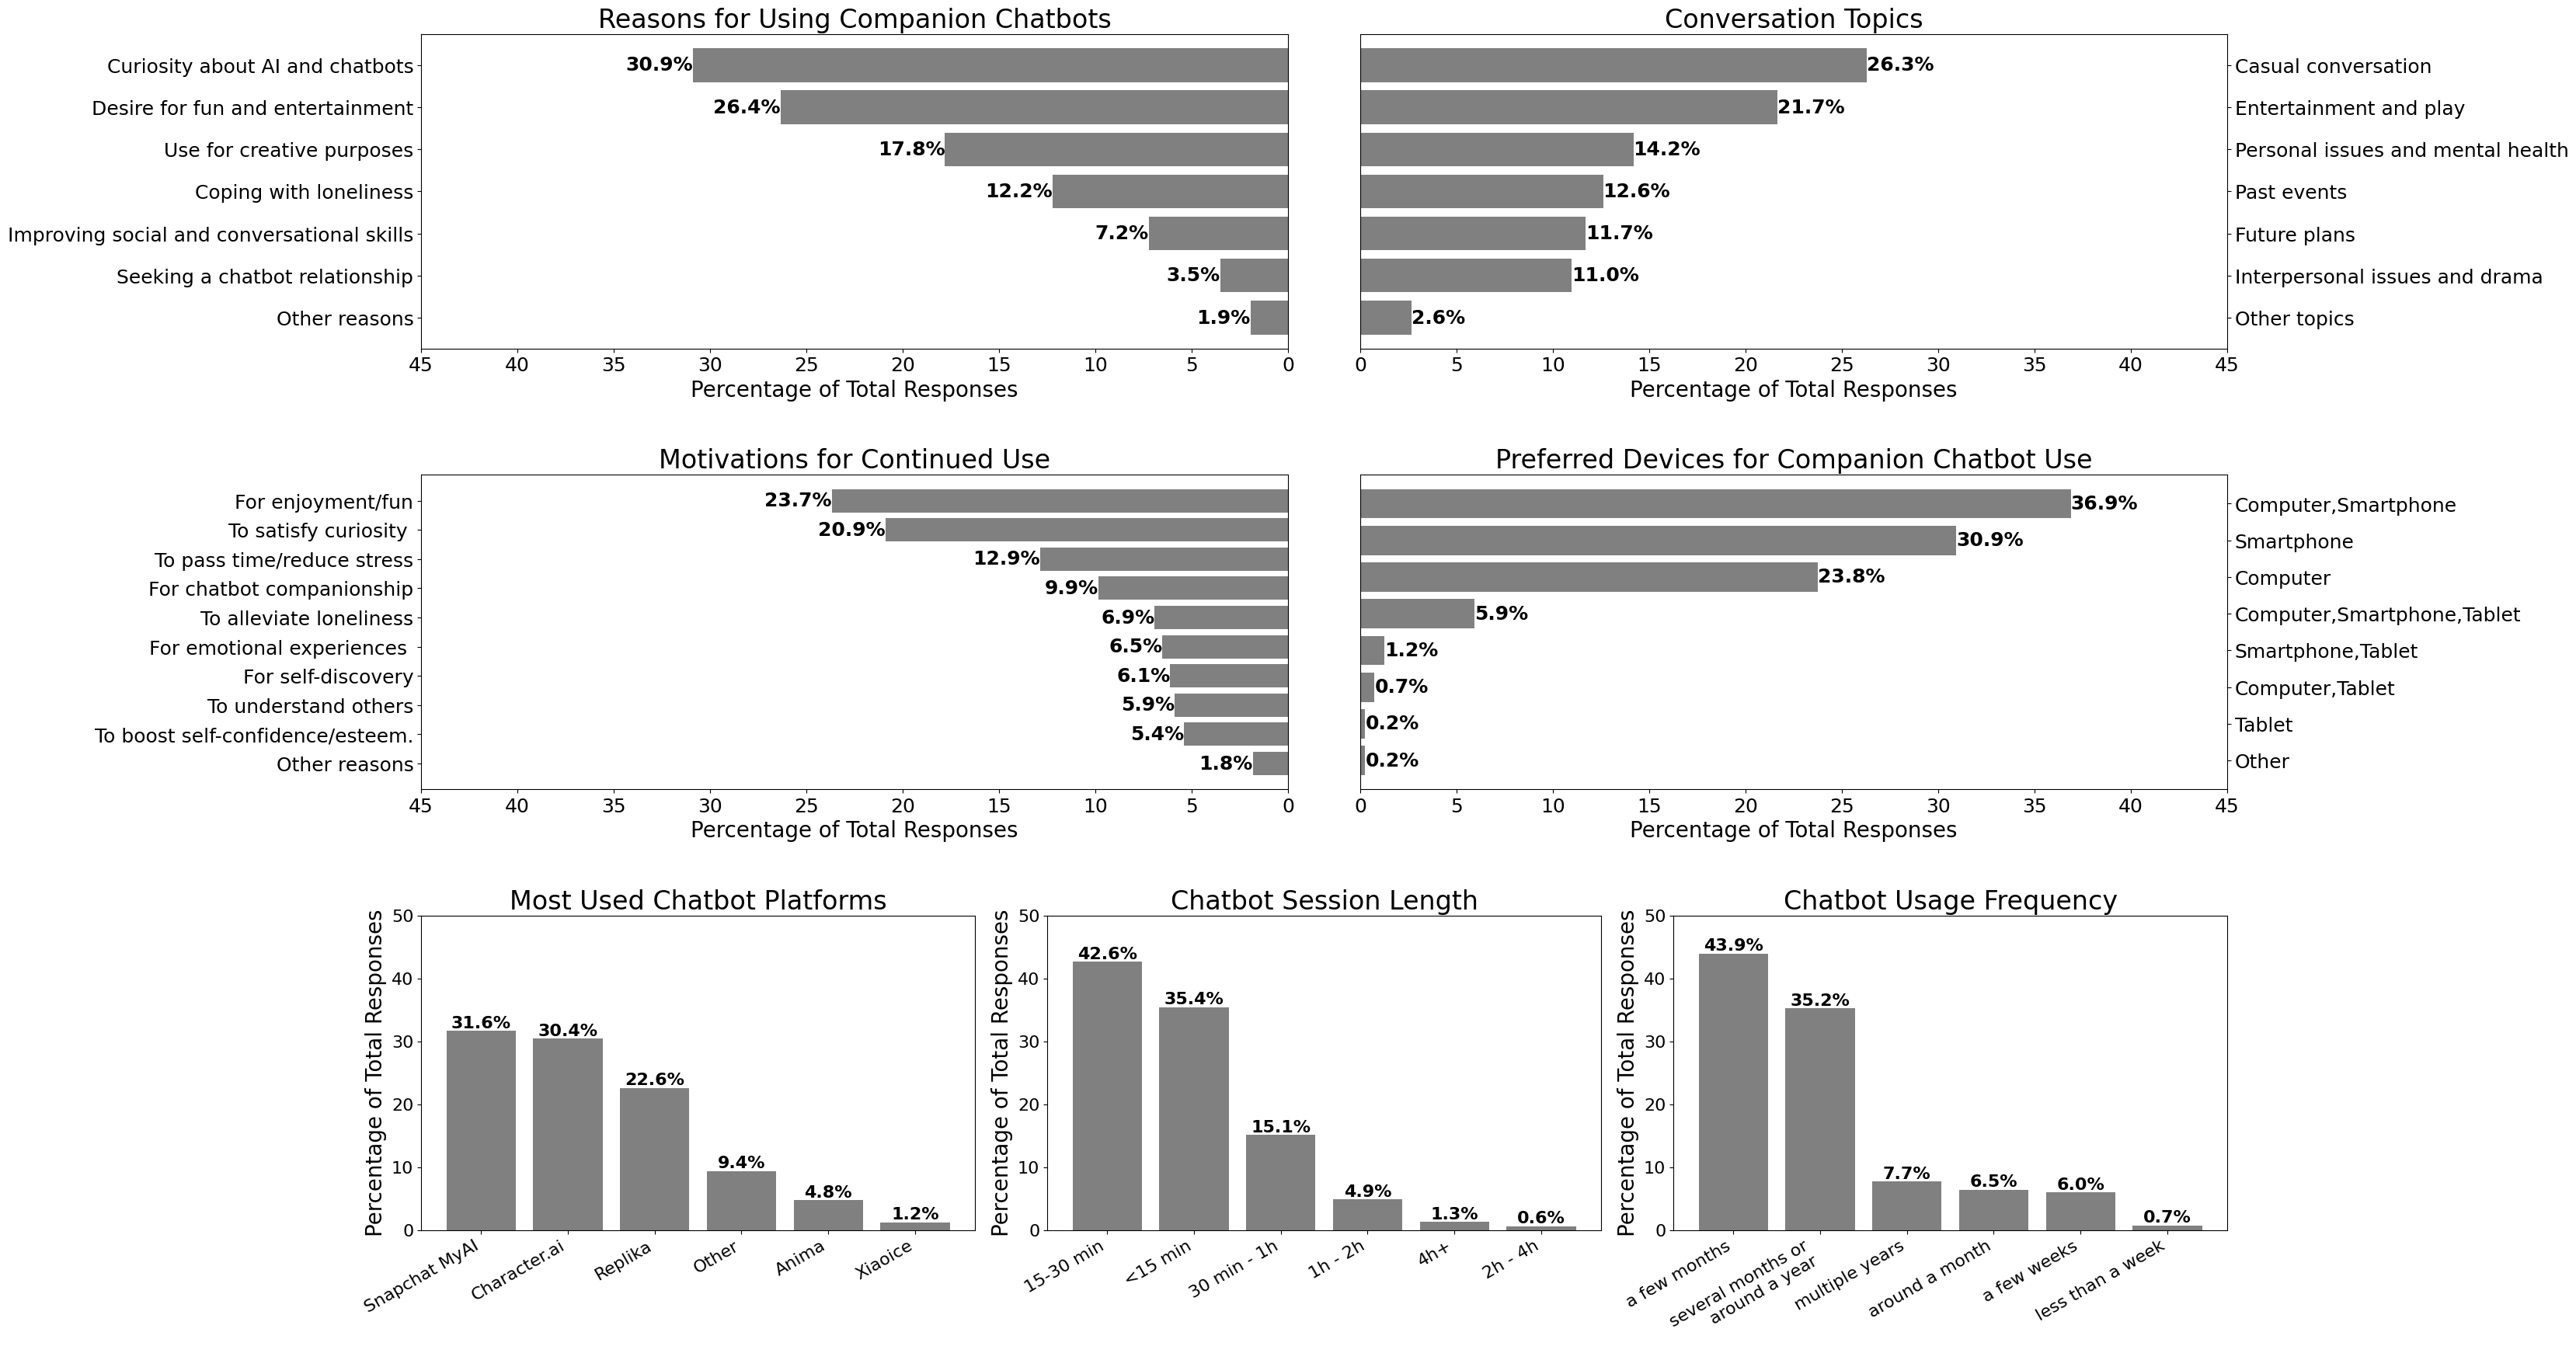

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.backends.backend_pdf import PdfPages
import textwrap

def analyze_distribution(df, column, split_answers=True):
    if split_answers:
        all_answers = df[column].str.split(',').explode()
    else:
        all_answers = df[column]
    
    answer_counts = all_answers.value_counts()
    total_answers = answer_counts.sum()
    percentages = (answer_counts / total_answers * 100).round(2)
    
    return percentages.sort_values(ascending=True)

def wrap_labels(labels, max_width=10):
    return [textwrap.fill(label, max_width) for label in labels]

def create_combined_chart(df_cleaned, columns_to_analyze):
    horizontal_columns = ['Use_Interest', 'Chatbot_Topics', 'Continued_Use', 'Chatbot_Device']
    vertical_columns = ['Which_Chatbots', 'Session_Length', 'Usage_Timeframe']
    
    fig = plt.figure(figsize=(30, 20))
    
    gs = GridSpec(3, 6, figure=fig, hspace=0.4, wspace=0.3)
    
    # Create horizontal bar charts
    for idx, column in enumerate(horizontal_columns):
        row = idx // 2
        col = idx % 2
        
        ax = fig.add_subplot(gs[row, col*3:(col+1)*3])
        
        split_answers = column != 'Chatbot_Device'
        distribution = analyze_distribution(df_cleaned, column, split_answers)
        
        if col == 0:  # Left column
            bars = ax.barh(distribution.index, distribution.values, color='gray', align='center')
            ax.set_xlim(45, 0)  # Reverse x-axis
            ax.yaxis.tick_left()
            ax.yaxis.set_label_position("left")
            for bar in bars:
                width = bar.get_width()
                ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                        ha='right', va='center', fontsize=18, fontweight='bold')
        else:  # Right column
            bars = ax.barh(distribution.index, distribution.values, color='gray', align='center')
            ax.set_xlim(0, 45)
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")
            for bar in bars:
                width = bar.get_width()
                ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                        ha='left', va='center', fontsize=18, fontweight='bold')
        
        title_map = {
            'Use_Interest': 'Reasons for Using Companion Chatbots',
            'Chatbot_Topics': 'Conversation Topics',
            'Continued_Use': 'Motivations for Continued Use',
            'Chatbot_Device': 'Preferred Devices for Companion Chatbot Use'
        }
        ax.set_title(title_map[column], fontsize=24)
        ax.set_xlabel('Percentage of Total Responses', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=18)
    
    # Create vertical bar charts
    for idx, column in enumerate(vertical_columns):
        ax = fig.add_subplot(gs[2, idx*2:(idx+1)*2])
        distribution = analyze_distribution(df_cleaned, column)
        
        # Reverse the order of the index and values
        reversed_index = distribution.index[::-1]
        reversed_values = distribution.values[::-1]
        
        bars = ax.bar(range(len(reversed_index)), reversed_values, color='gray')
        
        title_map = {
            'Which_Chatbots': 'Most Used Chatbot Platforms',
            'Session_Length': 'Chatbot Session Length',
            'Usage_Timeframe': 'Chatbot Usage Frequency'
        }
        ax.set_title(title_map[column], fontsize=24)
        ax.set_ylabel('Percentage of Total Responses', fontsize=20)
        ax.set_ylim(0, 50)
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', 
                    ha='center', va='bottom', fontsize=16, fontweight='bold')
        
        # Wrap x-axis labels
        wrapped_labels = wrap_labels(reversed_index, max_width=20)
        ax.set_xticks(range(len(reversed_index)))
        ax.set_xticklabels(wrapped_labels, rotation=30, ha='right')
        
        # Adjust bottom margin to accommodate wrapped labels
        plt.setp(ax.get_xticklabels(), va="top")
        ax.set_xlabel('')  # Remove x-axis label to create more space
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("/work/Output Figures/chatbot-usage.pdf", format="pdf", bbox_inches="tight")
    plt.show()

    
    
# Assuming df_cleaned is your DataFrame
columns_to_analyze = [
    'Which_Chatbots', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics',
    'Session_Length', 'Usage_Timeframe', 'Chatbot_Device'
]

create_combined_chart(df_cleaned, columns_to_analyze)

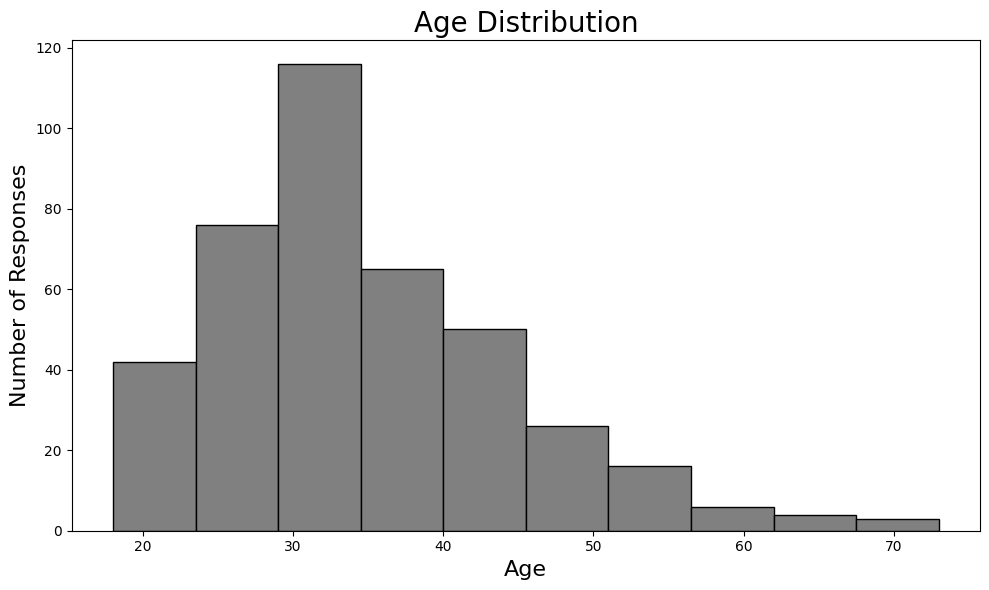

In [32]:
def create_age_histogram(df_cleaned):
    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size for the Age histogram

    # Create a histogram for the Age column
    ax.hist(df_cleaned['Age'].dropna(), bins=10, color='gray', edgecolor='black')
    ax.set_title('Age Distribution', fontsize=20)
    ax.set_xlabel('Age', fontsize=16)
    ax.set_ylabel('Number of Responses', fontsize=16)

    plt.tight_layout()
    plt.savefig("/work/Output Figures/age-distribution.pdf", format="pdf", bbox_inches="tight")
    plt.show()


create_age_histogram(df_cleaned)

In [13]:
plt.savefig("/work/Output Figures/chatbot-usage.pdf", format="pdf", bbox_inches="tight")
plt.close()  # Close the figure to free up memory



/tmp/ipykernel_683/3269787063.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


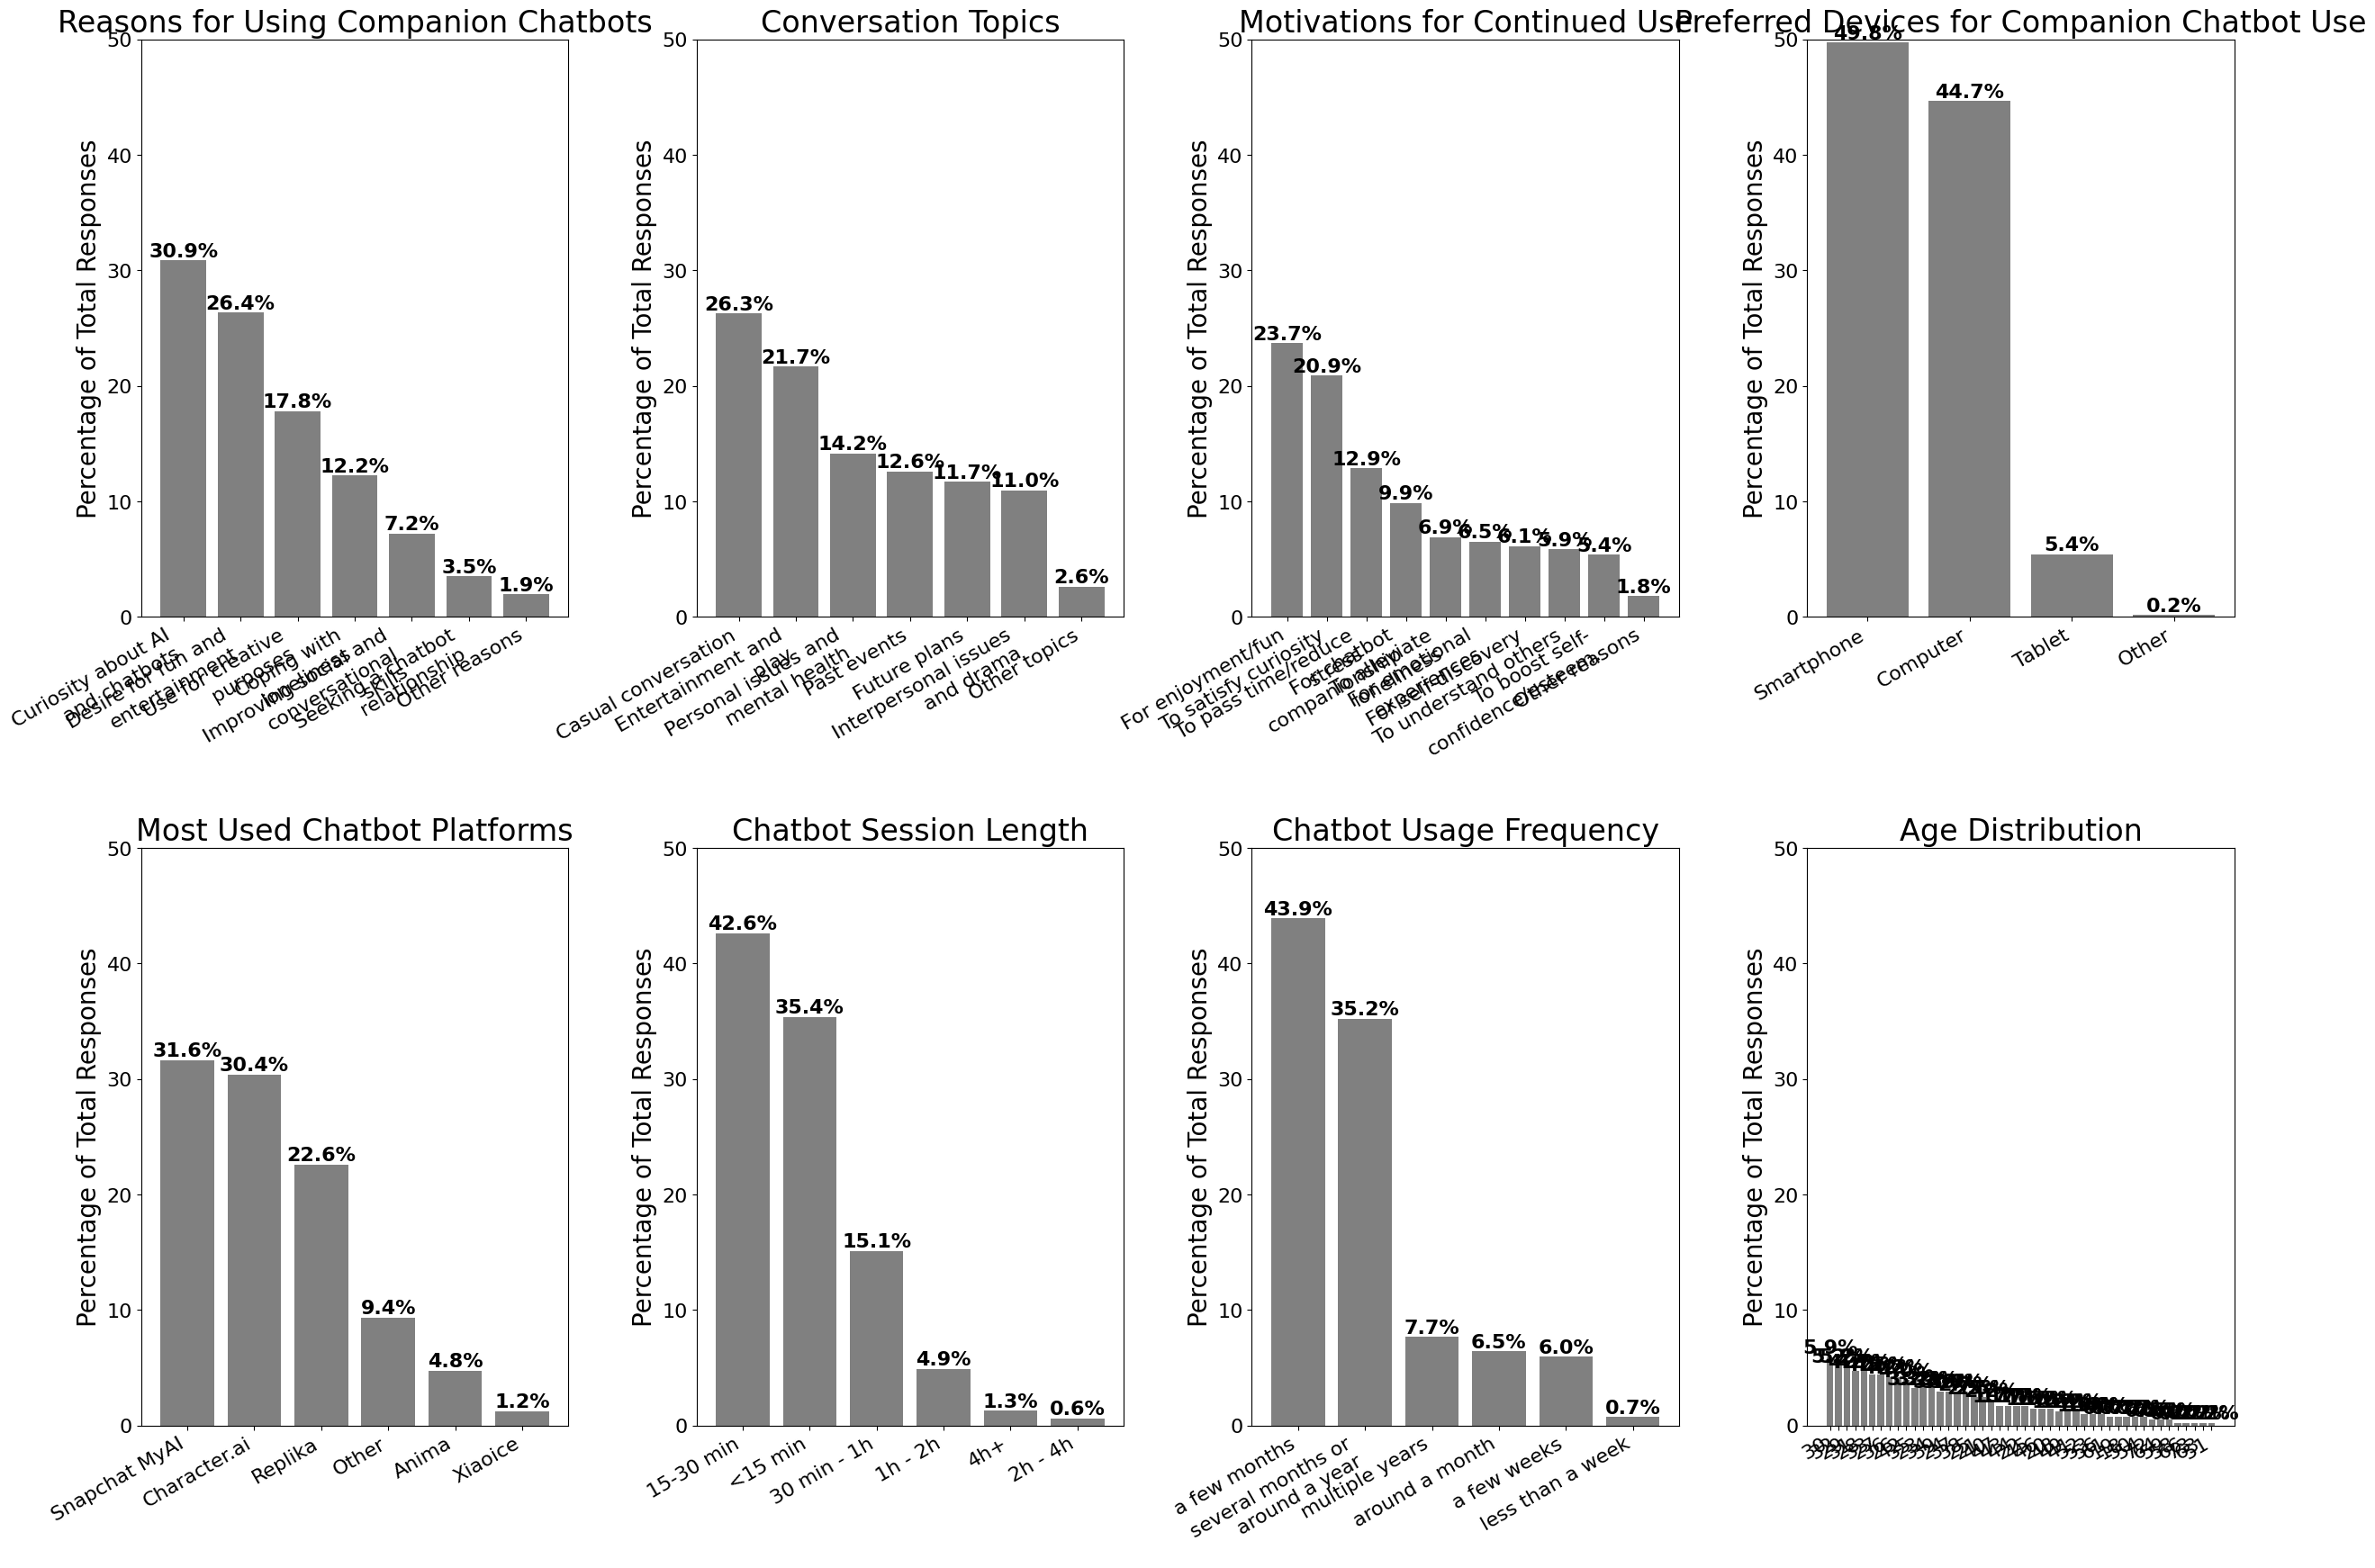

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.backends.backend_pdf import PdfPages
import textwrap

def analyze_distribution(df, column, split_answers=True):
    if split_answers:
        all_answers = df[column].str.split(',').explode()
    else:
        all_answers = df[column]
    
    answer_counts = all_answers.value_counts()
    total_answers = answer_counts.sum()
    percentages = (answer_counts / total_answers * 100).round(2)
    
    return percentages.sort_values(ascending=True)

def wrap_labels(labels, max_width=10):
    return [textwrap.fill(str(label), max_width) for label in labels]

def create_combined_chart(df_cleaned, columns_to_analyze):
    all_columns = ['Use_Interest', 'Chatbot_Topics', 'Continued_Use', 'Chatbot_Device', 
                   'Which_Chatbots', 'Session_Length', 'Usage_Timeframe', 'Age']
    
    fig = plt.figure(figsize=(30, 20))  # Adjust the figure size to fit 4 columns and 2 rows
    
    gs = GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.3)  # Set grid for 2 rows and 4 columns
    
    # Create vertical bar charts for all columns
    for idx, column in enumerate(all_columns):
        ax = fig.add_subplot(gs[idx // 4, idx % 4])  # Position the plots in 2 rows and 4 columns
        split_answers = False if column == 'Age' else True  # Age doesn't need to be split
        
        distribution = analyze_distribution(df_cleaned, column, split_answers)
        
        # Reverse the order of the index and values
        reversed_index = distribution.index[::-1]
        reversed_values = distribution.values[::-1]
        
        bars = ax.bar(range(len(reversed_index)), reversed_values, color='gray')
        
        title_map = {
            'Use_Interest': 'Reasons for Using Companion Chatbots',
            'Chatbot_Topics': 'Conversation Topics',
            'Continued_Use': 'Motivations for Continued Use',
            'Chatbot_Device': 'Preferred Devices for Companion Chatbot Use',
            'Which_Chatbots': 'Most Used Chatbot Platforms',
            'Session_Length': 'Chatbot Session Length',
            'Usage_Timeframe': 'Chatbot Usage Frequency',
            'Age': 'Age Distribution'
        }
        ax.set_title(title_map[column], fontsize=24)
        ax.set_ylabel('Percentage of Total Responses', fontsize=20)
        ax.set_ylim(0, 50)
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', 
                    ha='center', va='bottom', fontsize=16, fontweight='bold')
        
        # Wrap x-axis labels
        wrapped_labels = wrap_labels(reversed_index, max_width=20)
        ax.set_xticks(range(len(reversed_index)))
        ax.set_xticklabels(wrapped_labels, rotation=30, ha='right')
        
        plt.setp(ax.get_xticklabels(), va="top")
        ax.set_xlabel('')  # Remove x-axis label to create more space
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("/work/Output Figures/chatbot-usage-age.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Assuming df_cleaned is your DataFrame
columns_to_analyze = [
    'Which_Chatbots', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics',
    'Session_Length', 'Usage_Timeframe', 'Chatbot_Device', 'Age'
]

create_combined_chart(df_cleaned, columns_to_analyze)

/tmp/ipykernel_683/3637798504.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Reduced margin to fit everything


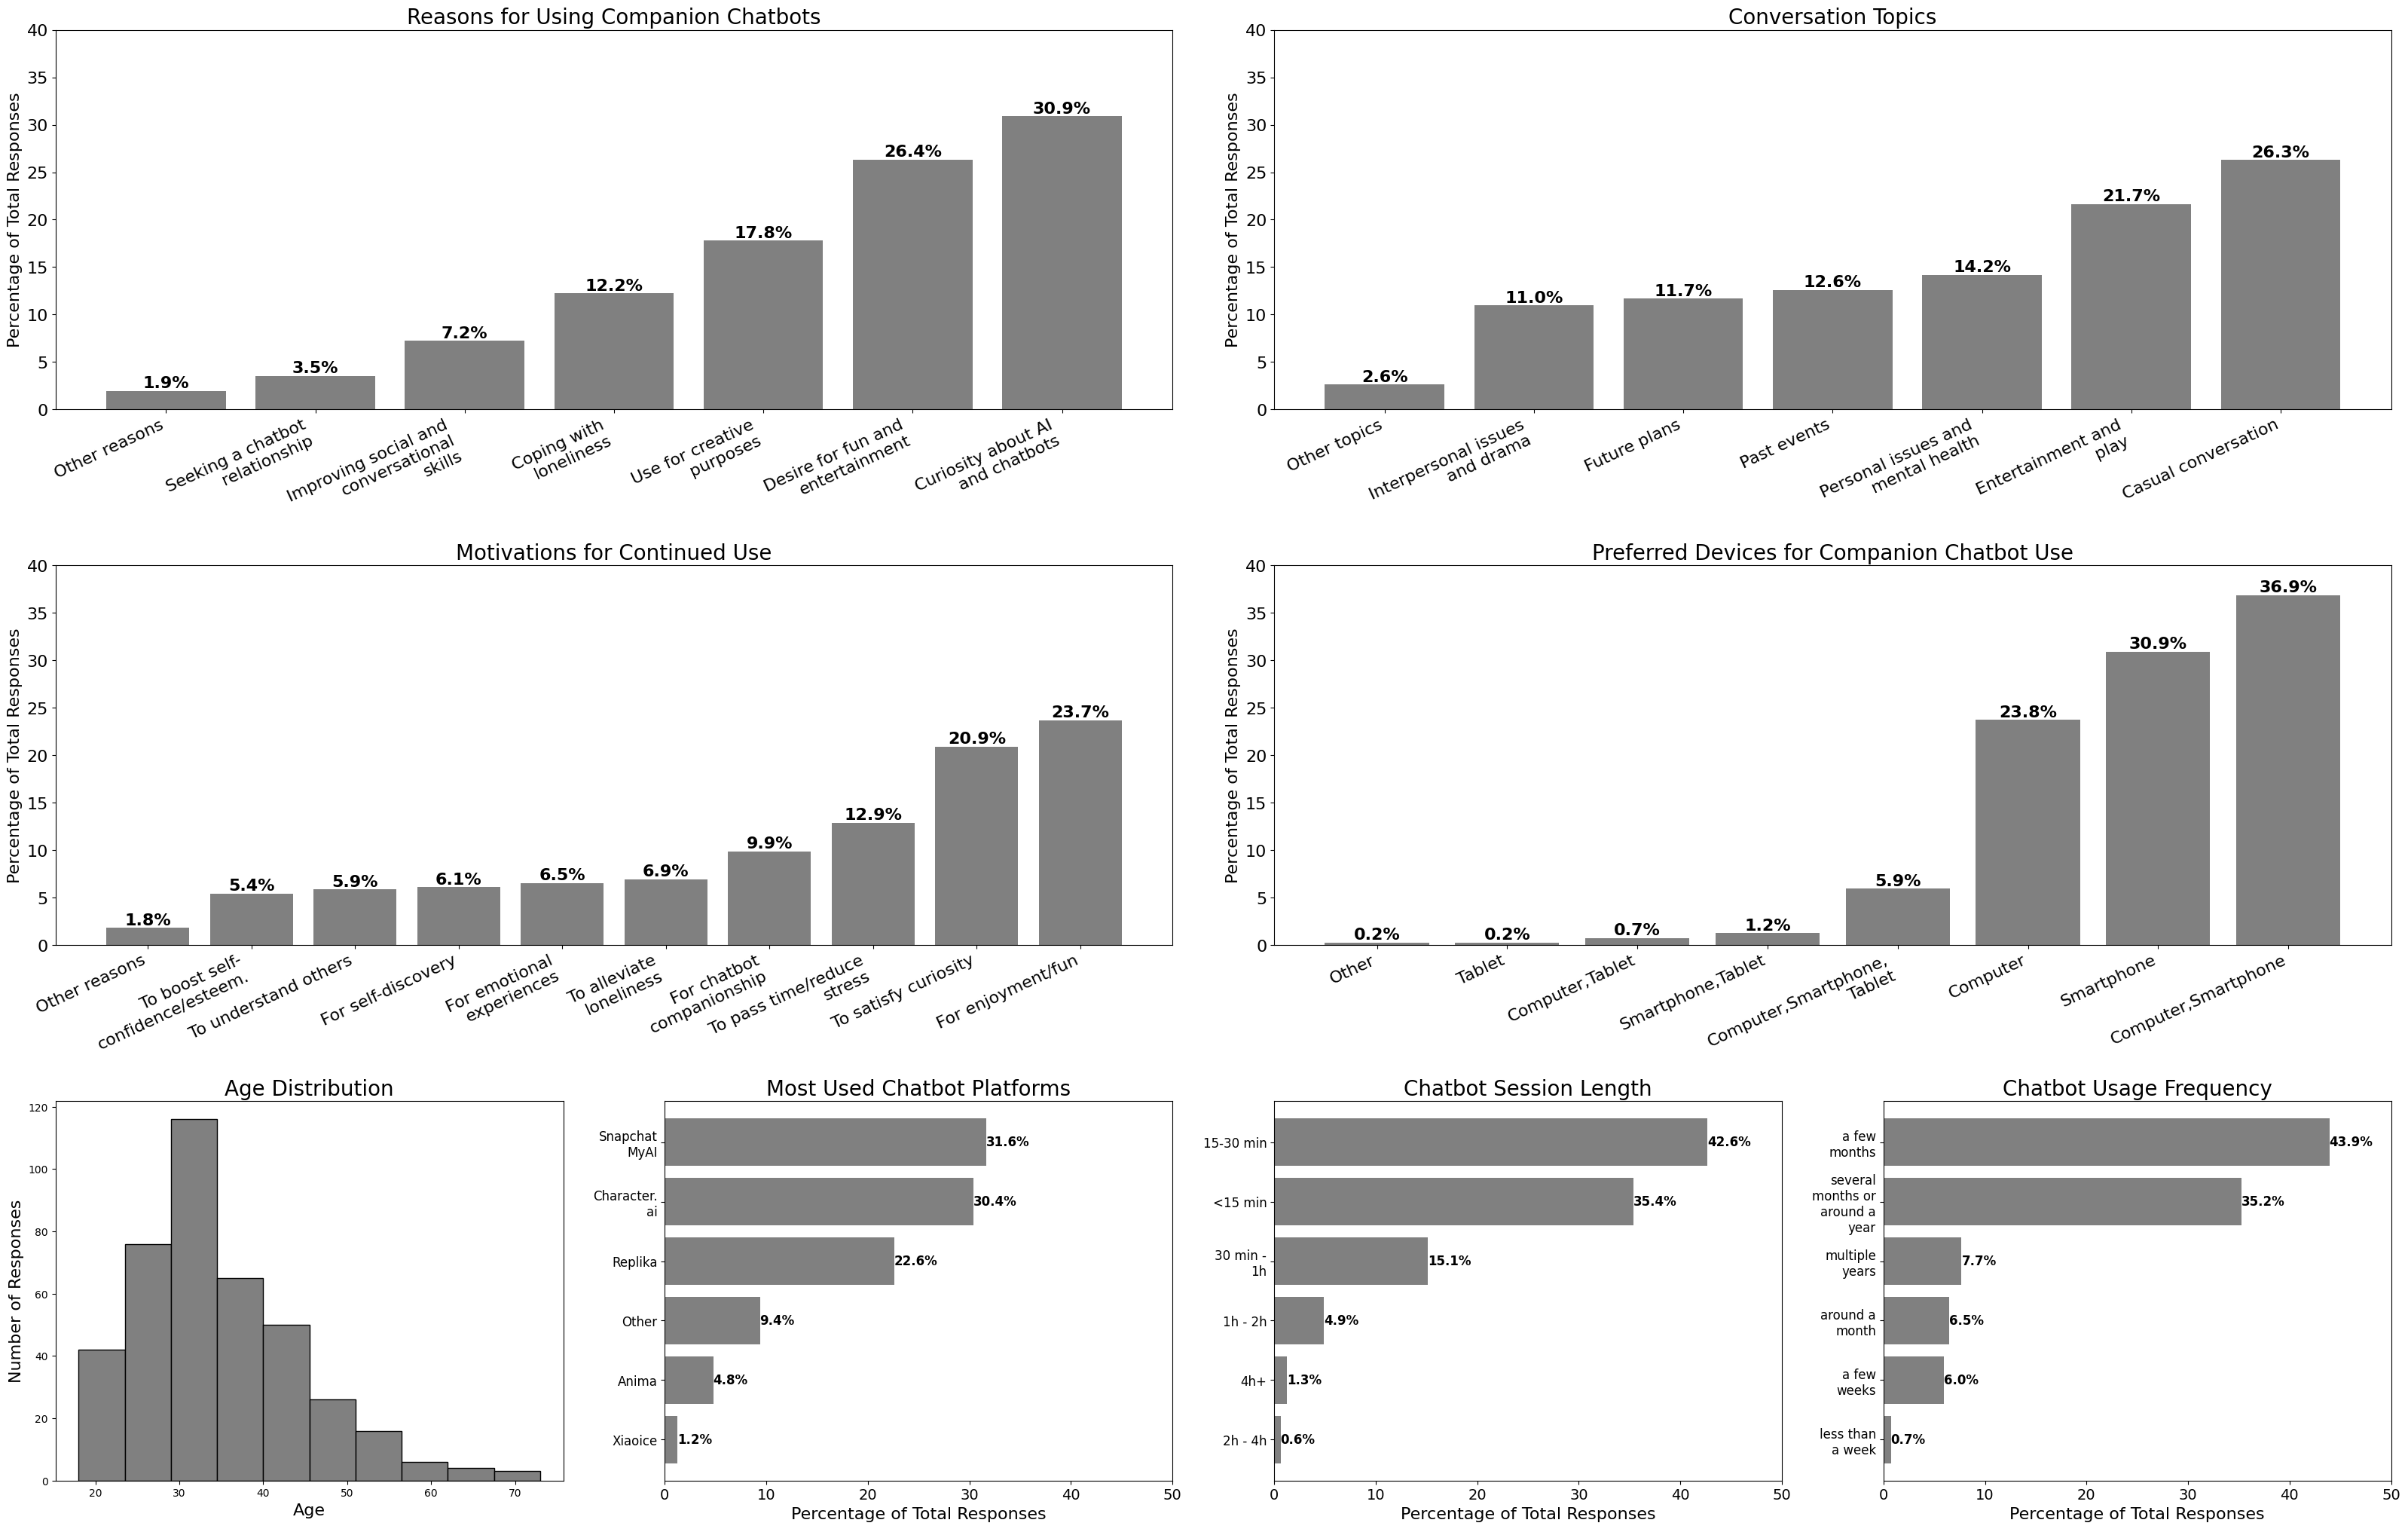

In [28]:
def create_combined_chart(df_cleaned, columns_to_analyze):
    top_columns = ['Use_Interest', 'Chatbot_Topics', 'Continued_Use', 'Chatbot_Device']
    bottom_columns = ['Age', 'Which_Chatbots', 'Session_Length', 'Usage_Timeframe']
    
    fig = plt.figure(figsize=(40, 25))  # Set figure size

    # Adjust the GridSpec to have 6 rows and 4 columns, where 4 graphs are placed on top
    gs = GridSpec(6, 4, figure=fig, hspace=1.4, wspace=0.2) 

    # Create vertical bar charts for the top 4 graphs (now in the first 2 rows)
    for idx, column in enumerate(top_columns):
        row = idx // 2  # Keep the top charts in the first rows
        col = idx % 2

        ax = fig.add_subplot(gs[row*2:(row+1)*2, col*2:(col+1)*2])

        split_answers = column != 'Chatbot_Device'
        distribution = analyze_distribution(df_cleaned, column, split_answers)

        bars = ax.bar(range(len(distribution.index)), distribution.values, color='gray')

        title_map = {
            'Use_Interest': 'Reasons for Using Companion Chatbots',
            'Chatbot_Topics': 'Conversation Topics',
            'Continued_Use': 'Motivations for Continued Use',
            'Chatbot_Device': 'Preferred Devices for Companion Chatbot Use'
        }
        ax.set_title(title_map[column], fontsize=20)  # Reduced font size
        ax.set_ylabel('Percentage of Total Responses', fontsize=16)  # Reduced font size
        ax.set_ylim(0, 40)
        ax.tick_params(axis='both', which='major', labelsize=16)  # Adjusted tick size

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', 
                    ha='center', va='bottom', fontsize=16, fontweight='bold')

        # Wrap x-axis labels
        wrapped_labels = wrap_labels(distribution.index, max_width=20)
        ax.set_xticks(range(len(distribution.index)))
        ax.set_xticklabels(wrapped_labels, rotation=25, ha='right', fontsize=16)  # Rotated for better spacing

    # Create horizontal bar charts for the bottom 3 graphs + 1 histogram for 'Age'
    for idx, column in enumerate(bottom_columns):
        ax = fig.add_subplot(gs[4:, idx])  # Remaining bottom row with graphs
        
        if column == 'Age':
            # Create a histogram for the Age column
            ax.hist(df_cleaned[column].dropna(), bins=10, color='gray', edgecolor='black')
            ax.set_title('Age Distribution', fontsize=20)
            ax.set_xlabel('Age', fontsize=16)  # Reduced font size
            ax.set_ylabel('Number of Responses', fontsize=16)
        else:
            distribution = analyze_distribution(df_cleaned, column)

            bars = ax.barh(distribution.index, distribution.values, color='gray', align='center')
            ax.set_xlim(0, 50)
            
            for bar in bars:
                width = bar.get_width()
                ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                        ha='left', va='center', fontsize=12, fontweight='bold')

            title_map = {
                'Which_Chatbots': 'Most Used Chatbot Platforms',
                'Session_Length': 'Chatbot Session Length',
                'Usage_Timeframe': 'Chatbot Usage Frequency'
            }
            ax.set_title(title_map[column], fontsize=20)
            ax.set_xlabel('Percentage of Total Responses', fontsize=16)
            ax.tick_params(axis='both', which='major', labelsize=14)
            ax.set_yticks(range(len(distribution.index)))
            wrapped_labels = wrap_labels(distribution.index)
            ax.set_yticklabels(wrapped_labels, fontsize=12)  # Adjusted font size for y-tick labels

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Reduced margin to fit everything
    plt.savefig("/work/Output Figures/chatbot-usage.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Assuming df_cleaned is your DataFrame
columns_to_analyze = [
    'Which_Chatbots', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics',
    'Session_Length', 'Usage_Timeframe', 'Chatbot_Device', 'Age'
]

create_combined_chart(df_cleaned, columns_to_analyze)

/tmp/ipykernel_683/1437472462.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Reduced margin to fit everything


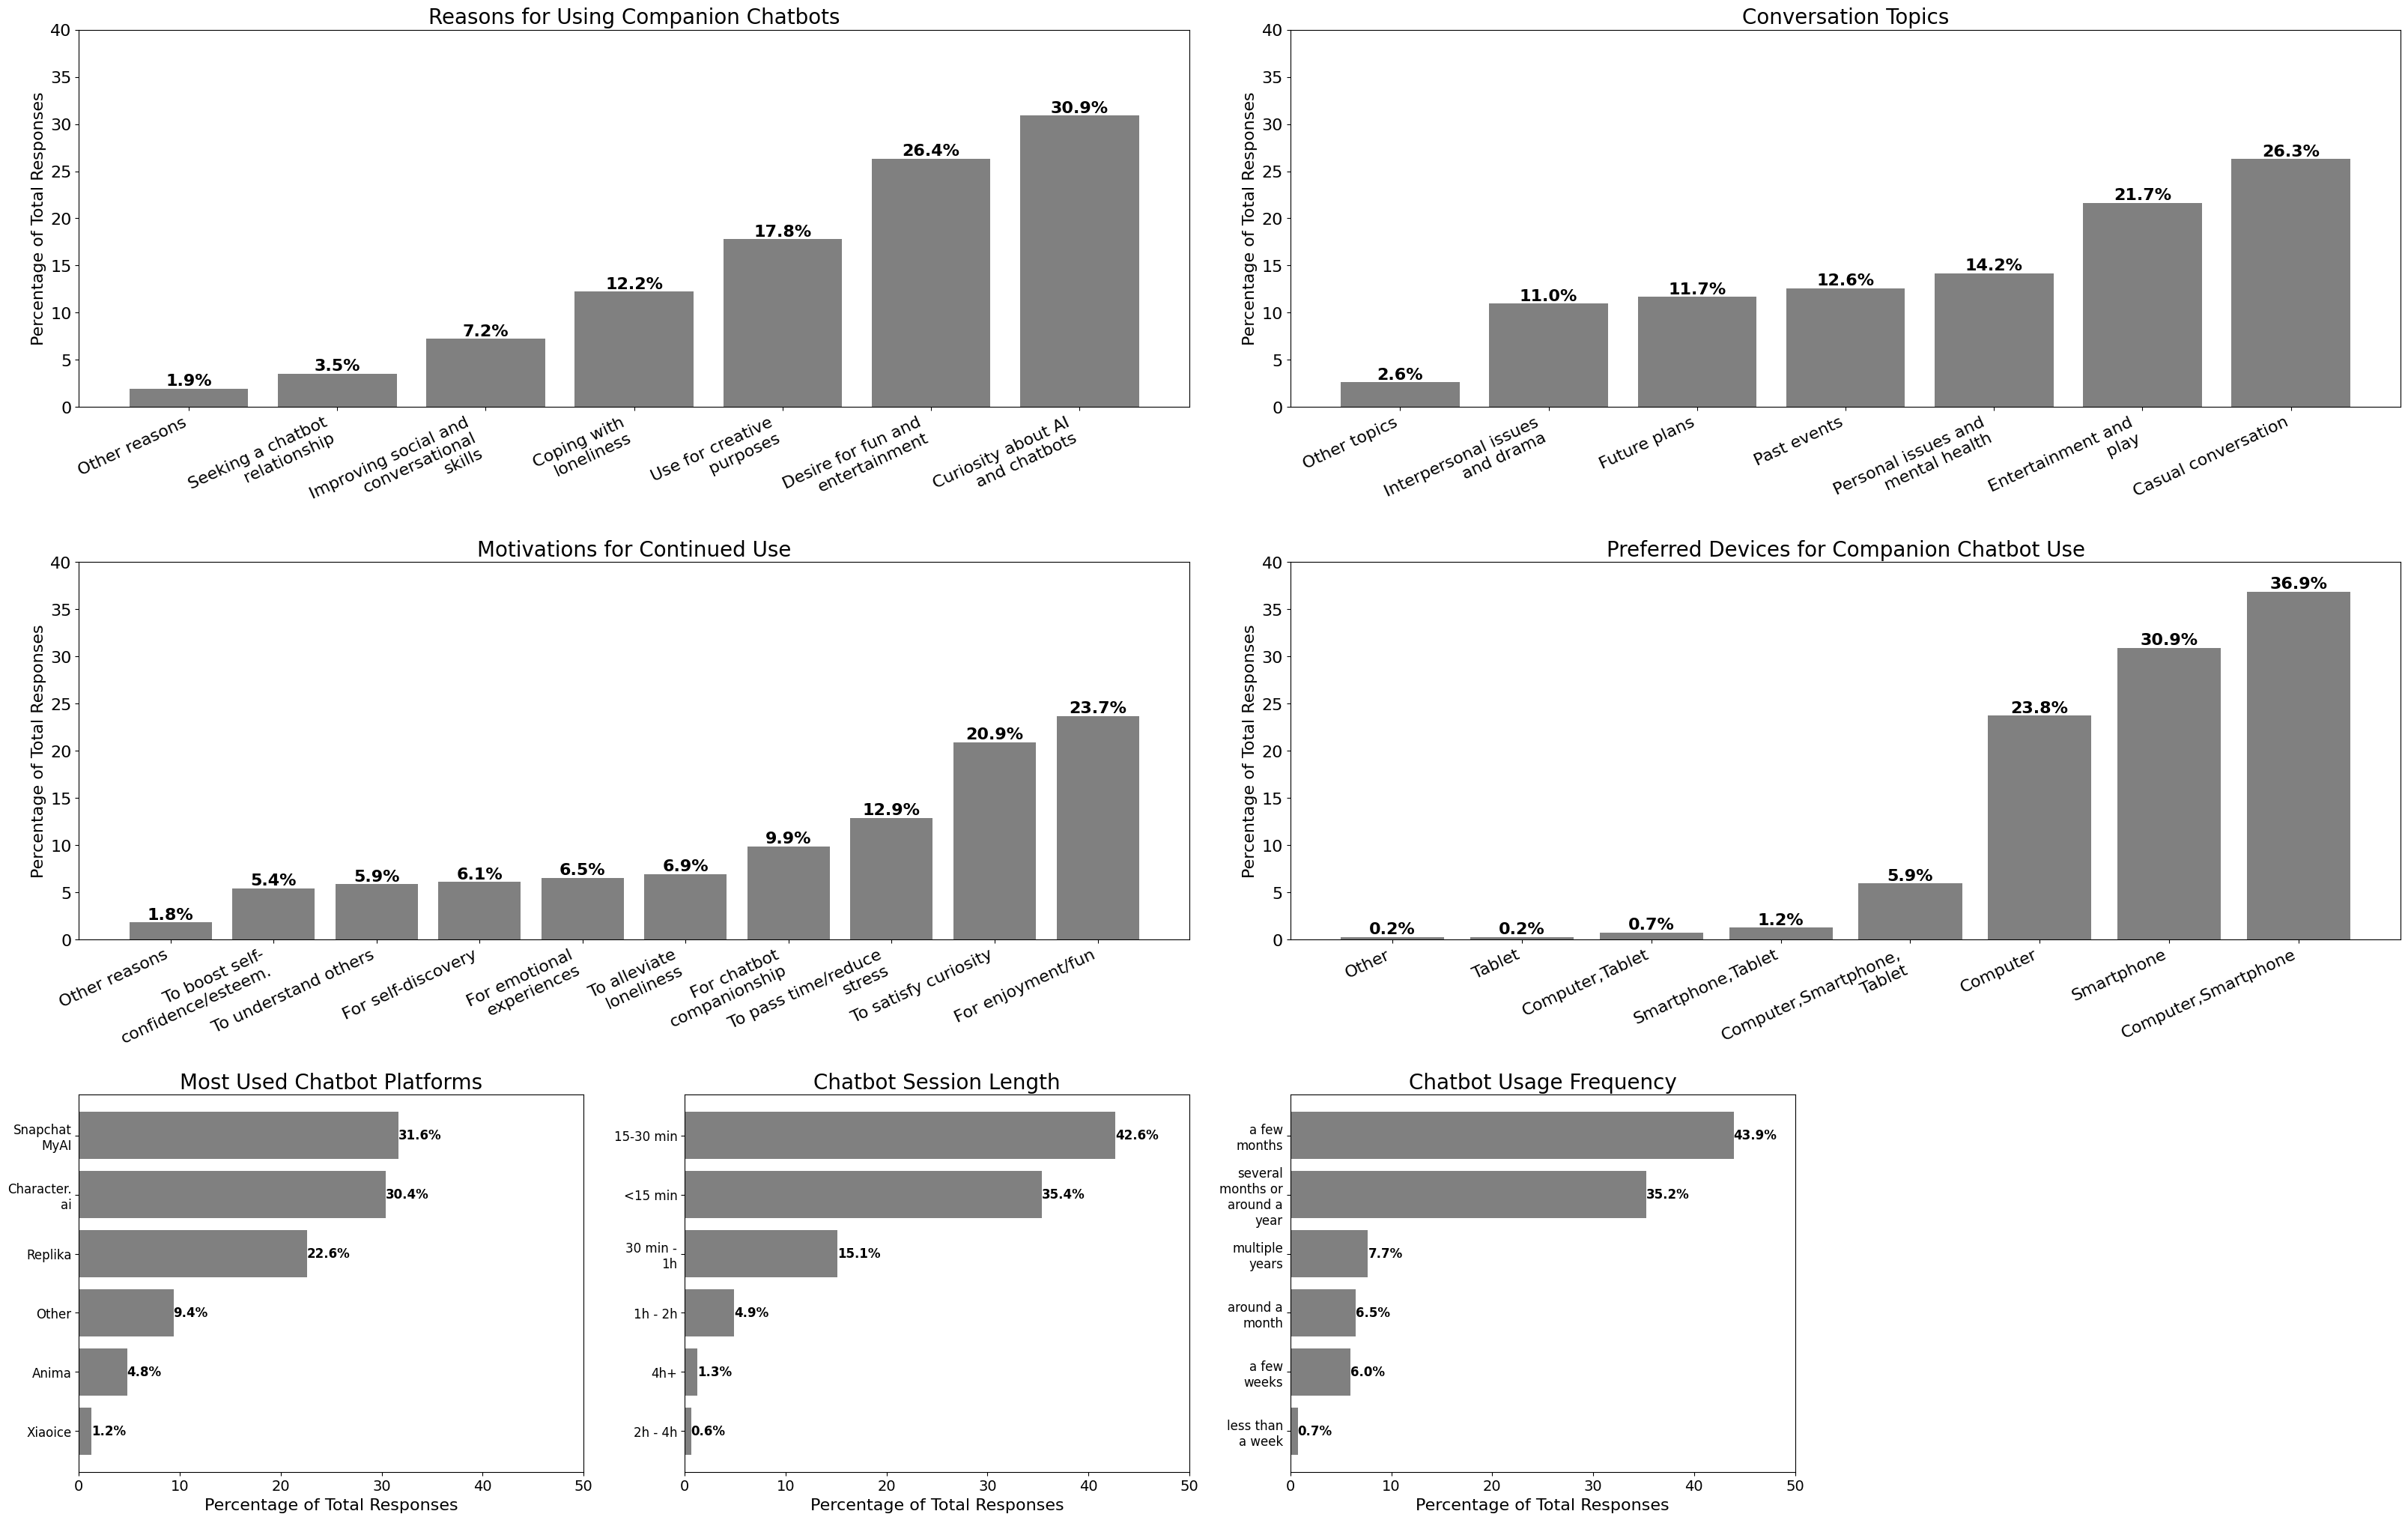

In [41]:
def create_combined_chart(df_cleaned, columns_to_analyze):
    top_columns = ['Use_Interest', 'Chatbot_Topics', 'Continued_Use', 'Chatbot_Device']
    bottom_columns = ['Which_Chatbots', 'Session_Length', 'Usage_Timeframe']
    
    fig = plt.figure(figsize=(40, 25))  # Set figure size

    # Adjust the GridSpec to have 6 rows and 4 columns, where 4 graphs are placed on top
    gs = GridSpec(6, 4, figure=fig, hspace=1.4, wspace=0.2) 

    # Create vertical bar charts for the top 4 graphs (now in the first 2 rows)
    for idx, column in enumerate(top_columns):
        row = idx // 2  # Keep the top charts in the first rows
        col = idx % 2

        ax = fig.add_subplot(gs[row*2:(row+1)*2, col*2:(col+1)*2])

        split_answers = column != 'Chatbot_Device'
        distribution = analyze_distribution(df_cleaned, column, split_answers)

        bars = ax.bar(range(len(distribution.index)), distribution.values, color='gray')

        title_map = {
            'Use_Interest': 'Reasons for Using Companion Chatbots',
            'Chatbot_Topics': 'Conversation Topics',
            'Continued_Use': 'Motivations for Continued Use',
            'Chatbot_Device': 'Preferred Devices for Companion Chatbot Use'
        }
        ax.set_title(title_map[column], fontsize=20)  # Reduced font size
        ax.set_ylabel('Percentage of Total Responses', fontsize=16)  # Reduced font size
        ax.set_ylim(0, 40)
        ax.tick_params(axis='both', which='major', labelsize=16)  # Adjusted tick size

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', 
                    ha='center', va='bottom', fontsize=16, fontweight='bold')

        # Wrap x-axis labels
        wrapped_labels = wrap_labels(distribution.index, max_width=20)
        ax.set_xticks(range(len(distribution.index)))
        ax.set_xticklabels(wrapped_labels, rotation=25, ha='right', fontsize=16)  # Rotated for better spacing

    # Create horizontal bar charts for the bottom 3 graphs + 1 histogram for 'Age'
    for idx, column in enumerate(bottom_columns):
        ax = fig.add_subplot(gs[4:, idx])  # Remaining bottom row with graphs
        
        if column == 'Age':
            # Create a histogram for the Age column
            ax.hist(df_cleaned[column].dropna(), bins=10, color='gray', edgecolor='black')
            ax.set_title('Age Distribution', fontsize=20)
            ax.set_xlabel('Age', fontsize=16)  # Reduced font size
            ax.set_ylabel('Number of Responses', fontsize=16)
        else:
            distribution = analyze_distribution(df_cleaned, column)

            bars = ax.barh(distribution.index, distribution.values, color='gray', align='center')
            ax.set_xlim(0, 50)
            
            for bar in bars:
                width = bar.get_width()
                ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                        ha='left', va='center', fontsize=12, fontweight='bold')

            title_map = {
                'Which_Chatbots': 'Most Used Chatbot Platforms',
                'Session_Length': 'Chatbot Session Length',
                'Usage_Timeframe': 'Chatbot Usage Frequency'
            }
            ax.set_title(title_map[column], fontsize=20)
            ax.set_xlabel('Percentage of Total Responses', fontsize=16)
            ax.tick_params(axis='both', which='major', labelsize=14)
            ax.set_yticks(range(len(distribution.index)))
            wrapped_labels = wrap_labels(distribution.index)
            ax.set_yticklabels(wrapped_labels, fontsize=12)  # Adjusted font size for y-tick labels

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Reduced margin to fit everything
    plt.savefig("/work/Output Figures/chatbot-usage.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Assuming df_cleaned is your DataFrame
columns_to_analyze = [
    'Which_Chatbots', 'Use_Interest', 'Continued_Use', 'Chatbot_Topics',
    'Session_Length', 'Usage_Timeframe', 'Chatbot_Device'
]

create_combined_chart(df_cleaned, columns_to_analyze)